In [ ]:
import torch
from torch import nn
Data=torch.arange(0.0,10.0,0.05).unsqueeze(dim=1)
weight=2
bias=5
Y=weight*Data+bias
train_split=int(0.8*len(Data))
X_Train=Data[:train_split]
Y_Train=Y[:train_split]
X_Test=Data[train_split:]
Y_Test=Y[train_split:]


In [ ]:
class linearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)


In [ ]:
model_1=linearRegressionModel()


In [ ]:
loss_fn=torch.nn.MSELoss()

In [ ]:
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.001)


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.1522]])),
             ('linear_layer.bias', tensor([0.4722]))])

In [ ]:
import matplotlib.pyplot as plt
def plot_predictions(train_input=X_Train,train_output=Y_Train,test_input=X_Test,test_output=Y_Test,predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_input,train_output,c="b",s=3,label="training data")
  plt.scatter(test_input,test_output,c="g",s=5,label="testing data")
  if(predictions !=None):
    plt.scatter(test_input,predictions,c="r",s=5,label="predicted data")
  plt.xlabel("weights")
  plt.ylabel("bias")
  plt.legend(prop={"size": 14})

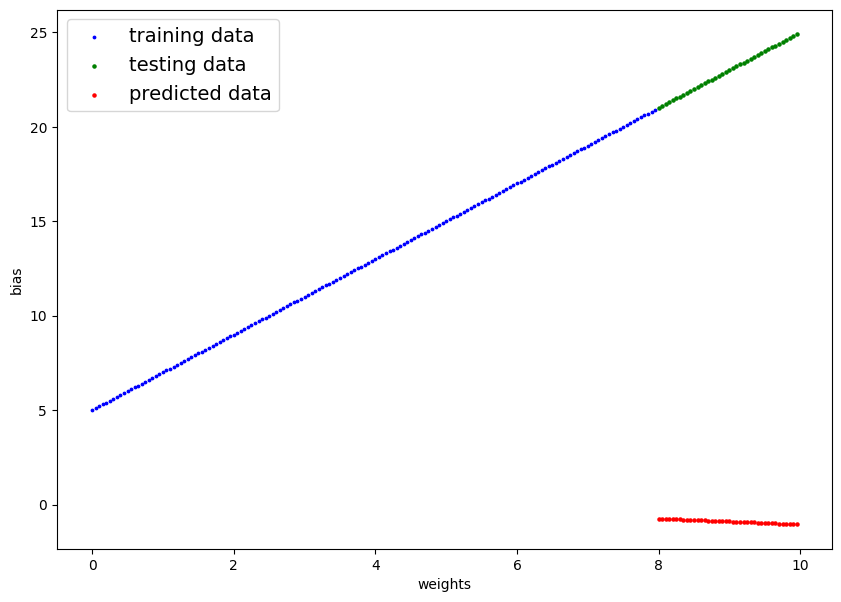

In [ ]:
with torch.inference_mode():
  pred=model_1(X_Test)
plot_predictions(predictions=pred)

In [ ]:
#training the model
epochs=10000
for epoch in range(epochs):
  model_1.train()
  training_prediction=model_1(X_Train)
  loss=loss_fn(training_prediction,Y_Train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(epoch%100==0):
    print(f"loss = {loss}")


loss = 195.8647003173828
loss = 3.642076015472412
loss = 3.281315565109253
loss = 2.9765572547912598
loss = 2.700106143951416
loss = 2.4493298530578613
loss = 2.221843957901001
loss = 2.0154871940612793
loss = 1.8282966613769531
loss = 1.6584911346435547
loss = 1.5044562816619873
loss = 1.3647279739379883
loss = 1.237977147102356
loss = 1.1229979991912842
loss = 1.018699288368225
loss = 0.9240862131118774
loss = 0.8382610082626343
loss = 0.7604066133499146
loss = 0.6897830367088318
loss = 0.6257187724113464
loss = 0.5676050186157227
loss = 0.5148873925209045
loss = 0.46706661581993103
loss = 0.42368659377098083
loss = 0.3843361735343933
loss = 0.3486403226852417
loss = 0.31625962257385254
loss = 0.2868870794773102
loss = 0.2602422833442688
loss = 0.2360714226961136
loss = 0.21414616703987122
loss = 0.19425739347934723
loss = 0.17621511220932007
loss = 0.1598488986492157
loss = 0.14500285685062408
loss = 0.1315358579158783
loss = 0.11931926012039185
loss = 0.10823734849691391
loss = 0.0

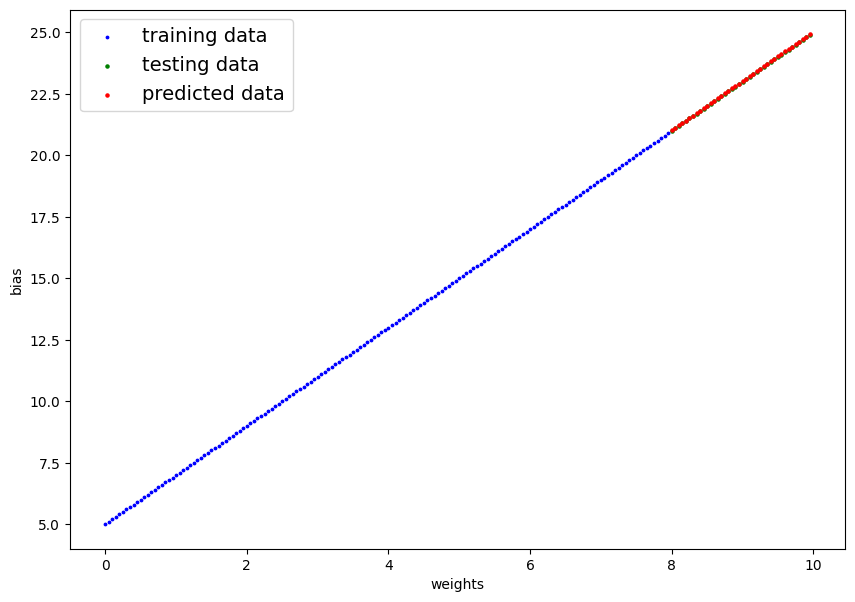

In [ ]:
with torch.inference_mode():
  new_prediction=model_1(X_Test)
plot_predictions(predictions=new_prediction)

In [ ]:
from pathlib import Path

In [ ]:
model_path=Path("practice_model")
model_path.mkdir(parents=True,exist_ok=True)


In [ ]:
model_save_path=model_path / "practice_LinearRegression_model.pth"
torch.save(obj=model_1.state_dict(),f=model_save_path)

In [ ]:
model_2=linearRegressionModel()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3886]])),
             ('linear_layer.bias', tensor([-0.9327]))])

In [ ]:
model_2.load_state_dict(torch.load(f=model_save_path))

<ipython-input-71-8e764d6b68c8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_2.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [ ]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[2.0058]])),
             ('linear_layer.bias', tensor([4.9696]))])

In [ ]:
def